In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
x, y = load_digits(return_X_y=True)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [12]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [13]:
x_test = scaler.transform(x_test)

In [14]:
y_pred = model.predict(x_test)

In [15]:
model.score(x_train, y_train)

0.9653679653679653

In [16]:
model.score(x_test, y_test)

0.9555555555555556

In [17]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0, 22]])

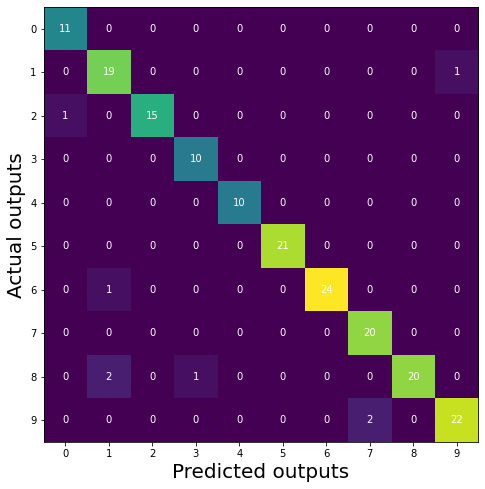

In [23]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=20, color='black')
ax.set_ylabel('Actual outputs', fontsize=20, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.86      0.95      0.90        20
           2       1.00      0.94      0.97        16
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        21
           6       1.00      0.96      0.98        25
           7       0.91      1.00      0.95        20
           8       1.00      0.87      0.93        23
           9       0.96      0.92      0.94        24

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [30]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [32]:
X_2d = tsne.fit_transform(X)

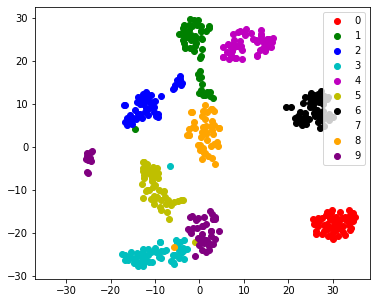

In [33]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

## Imports

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Leitura dataset

In [62]:
x, y = load_digits(return_X_y=True)

## Split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Scaling

In [64]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

## Regressão Logistica CV

In [101]:
for a in [0.001,.009,0.01,.09,1,5,10,25]:
    model = LogisticRegressionCV(Cs = [a], cv = 10, solver='liblinear', multi_class='ovr', random_state=0)
    model.fit(x_train, y_train)
    print(model.score(x_train, y_train))

0.9116214335421016
0.9478079331941545
0.9505915100904663
0.9700765483646486
0.9867780097425192
0.9958246346555324
0.9979123173277662
0.9979123173277662


In [102]:
model = LogisticRegressionCV(Cs = [0.001,.009,0.01,.09,1,5,10,25], cv = 10, solver='liblinear', multi_class='ovr', random_state=0)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))

0.9909533750869868


## Avaliacao

In [70]:
x_test = scaler.transform(x_test)

In [98]:
model.score(x_train, y_train)

0.988865692414753

In [99]:
model.score(x_test, y_test)

0.9527777777777777

In [15]:
y_pred = model.predict(x_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 37,  1,  0],
       [ 0,  3,  1,  1,  1,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  3, 37]])

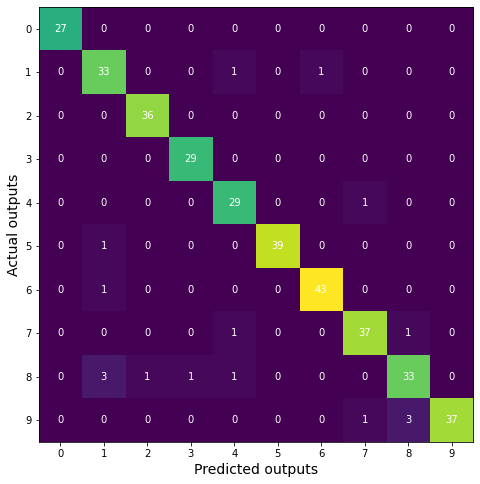

In [18]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=14, color='black')
ax.set_ylabel('Actual outputs', fontsize=14, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      0.94      0.90        35
           2       0.97      1.00      0.99        36
           3       0.97      1.00      0.98        29
           4       0.91      0.97      0.94        30
           5       1.00      0.97      0.99        40
           6       0.98      0.98      0.98        44
           7       0.95      0.95      0.95        39
           8       0.89      0.85      0.87        39
           9       1.00      0.90      0.95        41

    accuracy                           0.95       360
   macro avg       0.95      0.96      0.95       360
weighted avg       0.95      0.95      0.95       360



In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

skf = StratifiedKFold(n_splits=10)

In [60]:
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)

for traincv_index, valcv_index in skf.split(x_train, y_train):
    #print("TRAIN:", traincv_index, "TEST:", valcv_index)
    X_trainCV, X_valCV = x_train[traincv_index], x_train[valcv_index]
    y_trainCV, y_valCV = y_train[traincv_index], y_train[valcv_index]
    
    model.fit(X_trainCV, y_trainCV)
    y_predval = model.predict(X_valCV)
    
    print(f1_score(y_valCV,y_predval,average='macro'))
    print(recall_score(y_valCV,y_predval,average='macro'))
    print(accuracy_score(y_valCV,y_predval))
    #print(f1_score(y_valCV,y_predval))
    print()

0.9506257643707589
0.9502701465201465
0.9513888888888888

0.9789265692491499
0.9789148351648352
0.9791666666666666

0.9644490538094544
0.9641391941391942
0.9652777777777778

0.9382168055757069
0.9405860805860806
0.9444444444444444

0.9585145888594164
0.9580952380952381
0.9583333333333334

0.9716236735702809
0.971904761904762
0.9722222222222222

0.9728389971993977
0.9719047619047618
0.9722222222222222

0.9438021081625088
0.9438095238095239
0.9440559440559441

0.9787994891443168
0.9785714285714286
0.9790209790209791

0.9566845466155811
0.9583058608058609
0.958041958041958

